In [2]:
import numpy as np
import pandas as pd

import astropy.units as u
from astropy.io import votable
from astropy.coordinates import SkyCoord, CartesianRepresentation, SphericalRepresentation, matrix_utilities
from astropy.table import Table


from matplotlib import cm, colors, pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import plotly.graph_objects as go

from astroquery import gaia
from astroquery.gaia import Gaia as g
from astroquery.utils.tap import TapPlus

from galpy.orbit import Orbit

In [13]:
pclim = 1*u.pc
pxlim = pclim.to(u.marcsec, u.parallax())

qry=f"""
SELECT TOP 50 source_id, ra, dec, pmra, pmdec, parallax, radial_velocity, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(50, 30, 1)) AND radial_velocity IS NOT NULL AND ra IS NOT NULL AND dec IS NOT NULL
"""

job = g.launch_job_async(qry)
tab = job.get_results()
pandas_tab = tab.to_pandas()
len(tab)

INFO: Query finished. [astroquery.utils.tap.core]


50

In [15]:
pandas_tab['distance'] = pandas_tab['parallax']*u.marcsec.to(u.kpc, equivalencies=u.parallax())

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tab['ra'], y = tab['dec'], mode = 'markers'))
fig.update_xaxes(title = 'RA')
fig.update_yaxes(title = 'Dec', scaleanchor = 'x', scaleratio=1)

In [8]:
pandas_tab

,source_id,ra,dec,pmra,pmdec,parallax,radial_velocity,phot_g_mean_mag,distance
0,123849956121799040,50.668156,30.089402,0.358269,-2.630165,1.238385,-7.898159,14.305470,1.238385
1,123850918194472576,50.605696,30.125744,1.827283,-0.899580,1.282795,-6.412582,12.868219,1.282795
2,123851364871093120,50.747268,30.126798,12.841426,-5.130539,1.698674,-10.040328,13.369722,1.698674
3,123851639748974336,50.725087,30.150611,-4.347605,-2.336875,1.932736,-12.430915,10.437402,1.932736
4,123851674108713984,50.705441,30.143974,-2.232369,-4.605505,0.833619,-74.870270,14.152753,0.833619
...,...,...,...,...,...,...,...,...,...
95,123924478098317824,50.257250,30.518285,0.178814,-16.375421,4.188807,-9.618158,11.807168,4.188807
96,123924963430546560,50.133638,30.510259,-5.625981,-19.457766,2.198509,-7.404112,14.601899,2.198509
97,123925135229238656,50.125140,30.505619,-8.435623,-16.773168,1.539874,-5.904826,14.852227,1.539874
98,123925203948715008,50.103877,30.523788,8.372779,-3.648695,1.125087,-29.341572,14.799041,1.125087


In [17]:
skycoords = SkyCoord(ra=pandas_tab['ra']*u.deg, 
                    dec=pandas_tab['dec']*u.deg, 
                    distance=pandas_tab['distance']*u.kpc,
                    pm_ra_cosdec = pandas_tab['pmra']*u.mas/u.yr,
                    pm_dec=pandas_tab['pmdec']*u.mas/u.yr,
                    radial_velocity=pandas_tab['radial_velocity']*u.km/u.s,
                    frame='icrs')
skycoords

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(50.66815612, 30.0894022 , 1.23838464),
     (50.60569591, 30.12574376, 1.28279544),
     (50.74726832, 30.12679773, 1.69867441),
     (50.72508737, 30.15061063, 1.93273643),
     (50.70544137, 30.14397359, 0.83361901),
     (50.75233926, 30.15903164, 0.95368977),
     (50.7987771 , 30.17068307, 0.05816491),
     (50.74616817, 30.17209399, 0.43617733),
     (50.74392916, 30.18762883, 0.28135153),
     (50.70032074, 30.1775791 , 2.41350053),
     (50.66363027, 30.18309425, 2.66521118),
     (50.7003889 , 30.20046449, 5.31998992),
     (50.55286331, 30.13667572, 1.70197902),
     (50.55117654, 30.14976633, 3.7217073 ),
     (50.49602061, 30.20707094, 1.46204493),
     (50.56195328, 30.2116032 , 2.26689164),
     (50.56249765, 30.23913754, 2.79404117),
     (50.82927355, 30.27491902, 1.99887562),
     (50.81338543, 30.29381851, 0.44130527),
     (50.9455287 , 30.34277334, 0.88865393),
     (50.84504239, 30.34144168, 6.20746186)

In [18]:
orbits = Orbit(skycoords)
print(orbits.shape)

(50,)


Locator attempting to generate 9631 ticks ([-10.68, ..., 374.52]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3705 ticks ([-84.48, ..., 63.67999999999999]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9631 ticks ([-10.68, ..., 374.52]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3705 ticks ([-84.48, ..., 63.67999999999999]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9631 ticks ([-10.68, ..., 374.52]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3705 ticks ([-84.48, ..., 63.67999999999999]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9631 ticks ([-10.68, ..., 374.52]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3705 ticks ([-84.48, ..., 63.67999999999999]), which exceeds Locator.MAXTICKS (1000).


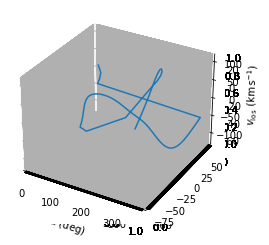

In [19]:
from galpy.potential import LogarithmicHaloPotential
lp = LogarithmicHaloPotential(normalize=1.)
o = Orbit(skycoords)
ts = np.linspace(0., 10, 100)
o.integrate(ts, lp)
#o.plot3d(d1='ra', d2='dec', d3='vlos')
o.animate(d1=['ra', 'x'],d2=['dec', 'y'])

In [179]:
len(o.getOrbit()[0])

200

In [20]:
o.getOrbit()

array([[[ 1.13412634e+00, -3.35409013e-02,  9.93065107e-01,
         -5.58449071e-02, -7.05229962e-04,  4.74848671e-02],
        [ 1.13069597e+00, -3.42916459e-02,  9.96077926e-01,
         -5.56947940e-02,  3.67992761e-03,  1.36198743e-01],
        [ 1.12721690e+00, -3.45030484e-02,  9.99152245e-01,
         -5.51015675e-02,  8.06267274e-03,  2.25457118e-01],
        ...,
        [ 1.14200819e+00, -3.06202490e-02,  9.86211227e-01,
          3.97920840e-02,  3.33256118e-02,  2.45141702e+00],
        [ 1.13880653e+00, -3.26895797e-02,  9.88983879e-01,
          4.29982733e-02,  3.01126341e-02,  2.53888946e+00],
        [ 1.13542161e+00, -3.42431095e-02,  9.91932242e-01,
          4.58668496e-02,  2.66445974e-02,  2.62686999e+00]],

       [[ 1.13891538e+00, -2.22115614e-03,  9.96793757e-01,
         -5.79474724e-02,  5.29523358e-02,  4.91295462e-02],
        [ 1.13867381e+00, -2.56269224e-03,  9.97005228e-01,
         -5.23785162e-02,  5.72415753e-02,  1.37553171e-01],
        [ 1.13839

In [ ]:
pclim = 1*u.pc
pxlim = pclim.to(u.marcsec, u.parallax())

qry=f"""
SELECT TOP 10000 source_id, ra, dec, pmra, pmdec, parallax, radial_velocity, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(50, 30, 1)) AND radial_velocity IS NOT NULL AND ra IS NOT NULL AND dec IS NOT NULL
"""

job = g.launch_job_async(qry)
tab = job.get_results()
pandas_tab = tab.to_pandas()
len(tab)